1.关于数据集

In [2]:
from sklearn import datasets
iris=datasets.load_iris()
digits=datasets.load_digits()
print(digits.data)#获得数据的自变量
digits.target#获得数组型响应变量
digits.images[0]#对应着data中的数据，每一个元素都是8*8的二维数组，其元素代表的是灰度值。

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [4]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

sklearn 有自带的数据集，类似与字典

In [3]:
import matplotlib.pyplot as plt
plt.figure(1,figsize=(3,3))
plt.imshow(digits.images[-1],cmap=plt.cm.gray_r,interpolation='nearest')
plt.show()

<Figure size 300x300 with 1 Axes>

In [3]:
digits.images.shape
data=digits.images.reshape((digits.images.shape[0],-1))#1797,64

当实例化估计器时，可以直接设置参数：estimator = Estimator(param1=1, param2=2)；

也可以以修改的方式进行：estimator.param1

当数据配有估计器时，参数将根据数据进行估计。 所有估计的参数都是估计对象的属性，以下划线结尾.
'estimator.estimated\_param\_'

2.关于估计器

In [6]:
from sklearn import svm
clf=svm.SVC(gamma=0.001,C=100.)#svm.SVM选择估计器
clf.fit(digits.data[:-1],digits.target[:-1])
clf.predict(digits.data[-1:])

array([8])

3.交叉验证通过score选择最优参数

给定一个估算器，交叉验证对象和输入数据集，cross_val_score将数据重复拆分为一个训练和一个测试集，使用该训练集训练该估算器，并根据测试集计算每次迭代的得分。

3.1 cross-validated metrics

In [7]:
from sklearn.model_selection import cross_val_score
clf = svm.SVC(kernel='linear', C=1)
scores = cross_val_score(clf, iris.data, iris.target, cv=5)
scores.shape

3.2交叉验证主要有哪些方法

3.2.1留出法：这样无法保证测试集与训练集的样本数据分布是一致的。

LeaveOneOut,LeavePOut

In [109]:
from sklearn.model_selection import LeaveOneOut
x=[1,2,3,4]
loo=LeaveOneOut()
for train,test in loo.split(x):
    print('%s %s' %(train,test))

from sklearn.model_selection import LeavePOut
x=np.ones(4)
lpo=LeavePOut(p=2)
for train,test in lpo.split(x):
    print('%s %s' %(train,test))

from sklearn.model_selection import ShuffleSplit
x=np.arange(10)
ss=ShuffleSplit(n_splits=5,test_size=0.25,random_state=0)
for train_index,test_index in ss.split(x):
    print('%s %s'%(train_index,test_index))

[1 2 3] [0]
[0 2 3] [1]
[0 1 3] [2]
[0 1 2] [3]
[2 3] [0 1]
[1 3] [0 2]
[1 2] [0 3]
[0 3] [1 2]
[0 2] [1 3]
[0 1] [2 3]
[9 1 6 7 3 0 5] [2 8 4]
[2 9 8 0 6 7 4] [3 5 1]
[4 5 1 0 6 9 7] [2 3 8]
[2 7 5 8 0 3 4] [6 1 9]
[4 1 0 6 8 9 3] [5 2 7]


3.2.2 k 折交叉验证（k-fold cross validation）以及RepeatedKFold:

In [108]:
from sklearn.model_selection import KFold
x=['a','b','c','d']
kf=KFold(n_splits=2)
for train,test in kf.split(x):
    print('%s %s' %(train,test))

from sklearn.model_selection import RepeatedKFold
x=np.array([[1,2],[3,4],[1,2],[3,4]])
random_state=12883823
rkf=RepeatedKFold(n_splits=2,n_repeats=2,random_state
=random_state)
for train,test in rkf.split(x):
    print('%s %s'%(train,test))

[2 3] [0 1]
[0 1] [2 3]
[2 3] [0 1]
[0 1] [2 3]
[0 2] [1 3]
[1 3] [0 2]


4.模型拟合fit

每个估计器都要用到fit方法
feature即为column，fit(x,y)对于无监督学习，不需要指定y。

x和y一般为数组对象或类数组对象。

5.transformer object没有predict对象，但有transform方法，可以输出被转换的矩阵对象X.

transformer与estimator有相同的api

In [8]:
from sklearn.preprocessing import StandardScaler
x=[[0,15],[1,-10]]
x_t=StandardScaler().fit(x)
#一般来说先使用fit，x_t里面存有计算出来的均值和方差。
#fit用于计算训练数据的均值和方差，后面就会用均值和方差来转换训练数据
print(x_t.transform(x))
#再使用transform，使用x_t中的均值和方差来转换X，使X标准化。

#以上与下面的计算结果是一样的
print(sklearn.preprocessing.scale(x))

[[-1.  1.]
 [ 1. -1.]]
[[-1.  1.]
 [ 1. -1.]]


5.1数据预处理，preprocessing中提供了很多的Scaler:

StandardScaler；Normalizer

MaxAbsScaler；MinMaxScaler；RobustScaler；

对应的有直接的函数使用：scale(),normaizer(),maxabs_scale();minmax_scale(),robust_scale()

还有OneHotEncoder()是类别特征编码;LabelEncoder()是标签编码;Binarizer(threshold=1.1)是特征二值化

5.2 normalizer()归一化函数的用法

In [12]:
import numpy as np
import sklearn
example=np.array([[2.0,6.0,7.0],[8.0,9.0,10.0]])#是输入数据src
alpha=5
beta=100
#norm_l1
##第一步：先求出norm--所有元素的绝对值和
print(example.sum(axis=1))
##第二步，求输出数据,公式$dst=alpha*src/norm_l1$
print([i/15 for i in example[0,:].tolist()])
print([i/15 for i in example[1,:].tolist()])
sklearn.preprocessing.normalize(example,norm='l1')
#axis=1是默认的，表示按行进行normalize
#norm有'l1','l2','max'分别表示各个特征值分别除以各维度（跟据axis确定）的norm 

#max
##第一步：先求出norm--求最大值
print(example.max(axis=1))
##第二步，求输出数据,公式$dst=alpha*src/norm_l1$
print([i/7 for i in example[0,:].tolist()])
print([i/10 for i in example[1,:].tolist()])
sklearn.preprocessing.normalize(example,norm='max')

[15. 27.]
[0.13333333333333333, 0.4, 0.4666666666666667]
[0.5333333333333333, 0.6, 0.6666666666666666]
[ 7. 10.]
[0.2857142857142857, 0.8571428571428571, 1.0]
[0.8, 0.9, 1.0]


array([[0.28571429, 0.85714286, 1.        ],
       [0.8       , 0.9       , 1.        ]])

5.3 one_hot编码

In [41]:
data= np.array([[1],[2]])

encoder=sklearn.preprocessing.OneHotEncoder().fit(data)
(encoder.transform(data)).toarray()
#help(sklearn.preprocessing.OneHotEncoder)

C:\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


array([[1., 0.],
       [0., 1.]])

6.transformers+estimator/predictor=pipline

pipline与estimator有相同的api,有fit方法和predict方法

一般的管道( pipeline ) 包括了两个部分：
① 作为输入端的预处理器( pre-processor)：
转换(Transform)或者”推断？“( imputes )数据
② 作为输出端的预测器( predictor )：预测目标值的预测器( predictor )

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score

In [8]:
pipe = make_pipeline(StandardScaler(),LogisticRegression(random_state=0))#创造一个pipeline对象(内有预处理和编辑器)

x,y=load_iris(return_X_y=True)
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)#下载数据并且分割训练集与测试集

pipe.fit(x_train,y_train)#fit the whole pipline
accuracy_score(pipe.predict(x_test),y_test)

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.8157894736842105

7.model evaluation

模型训练完成之后应该立马进行模型评估，而不是直接去预测未见过的”新数据“。

除了train_test_split,scikit-learn提供了cross-validation方法切割样本 

In [17]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
x,y=make_regression(n_samples=1000,random_state=0)

#make_regression表示样本生成器，The output is generated by applying a (potentially biased) random linear regression model
lr=LinearRegression()
result=cross_validate(lr,x,y)
result['test_score']
help(cross_validate)

Help on function cross_validate in module sklearn.model_selection._validation:

cross_validate(estimator, X, y=None, groups=None, scoring=None, cv='warn', n_jobs=None, verbose=0, fit_params=None, pre_dispatch='2*n_jobs', return_train_score=False, return_estimator=False, error_score='raise-deprecating')
    Evaluate metric(s) by cross-validation and also record fit/score times.
    
    Read more in the :ref:`User Guide <multimetric_cross_validation>`.
    
    Parameters
    ----------
    estimator : estimator object implementing 'fit'
        The object to use to fit the data.
    
    X : array-like
        The data to fit. Can be for example a list, or an array.
    
    y : array-like, optional, default: None
        The target variable to try to predict in the case of
        supervised learning.
    
    groups : array-like, with shape (n_samples,), optional
        Group labels for the samples used while splitting the dataset into
        train/test set. Only used in conjunctio

8. 超参数以及调参

超参数不由估计器给出，而是作为参数直接传入估计器。
所有的评估器都有参数（或者说超参数），它们可以被调试。一般情况下，我们并不知道该怎么选参数值，因为它们由我们手里的数据所决定。

在scikit-learn中提供两种来选择最优参数：RandomizedSearchCV和GridSearchCV

A Search包括一个估计器、一个参数空间、一种抽样方法、交叉验证次数、一个得分方程（用于评价不同参数的效果。分类用sklearn.metrics.accuracy_score，回归用sklearn.metrics.r2_score）。

8.1 RandomizedSearchCV

Sklearn 中提供了一些可以自动寻找最优参数组合的工具（通过交叉验证）。下面以 RandomizedSearchCV 
对象为例，当搜索结束之后 RandomizedSearchCV 就变成了类似 RandomForestRegressor 的角色。

另外，使用采样迭代数'n_iter' parameter或采样候选数可以指定计算预算。

RandomizedSearchCV相比GridSearchCV具有两个主要优势：
第一、它的参数空间是随机产生的候选参数可以从其分布中产生。预算选择独立于参数个数和可能的值。
第二、增加不影响模型表现的参数不会降低效率。

In [ ]:
param_distributions={'C': scipy.stats.expon(scale=100),'gamma': scipy.stats.expon(scale=.1),'kernel': ['rbf'],'class_weight':['balanced', None]}

In [4]:
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from scipy.stats import randint

In [5]:
X,y=fetch_california_housing(return_X_y=True)
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)
# define the parameter space that will be searched over
param_distributions={'n_estimators':randint(1,5),'max_depth':randint(5,10)}
# create a searchCV object and fit it to the data
search=RandomizedSearchCV(estimator=RandomForestRegressor(random_state=0),n_iter=5,
param_distributions=param_distributions,random_state=0)

In [7]:
search.fit(X_train,y_train)
# the search object now acts like a normal randomforest estimator
search.best_params_
search.score(X_test,y_test)

C:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.7349601117850644

8.2 GridSearchCV

当用训练集拟合数据时，所有的参数都被计算，但仅最好的留下来。

In [ ]:
param_grid = [{'C': [1, 10, 100, 1000],'kernel': ['linear']},{'C': [1, 10, 100, 1000],'gamma': [0.001, 0.0001],'kernel':['rbf']},]


8.3 metrics and scoring:quantifying the quality of predictions

precision_recall_curve和roc_curve仅适用于二分类。
多分类metrics
多标签排名指标(定序变量)适用的metrics
回归metrics
聚类metrics:adjusted_rand_score

9.有监督学习-例1

In [25]:
x,y=make_regression(n_samples=1000,random_state=0)
reg=LinearRegression().fit(x,y)
print(reg.score(x,y))
print(reg.coef_)
print(reg.intercept_)
print(reg.get_params())

1.0
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}


import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets,linear_model
from sklearn.metrics import mean_squared_error,r2_score
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)
diabetes_X.shape
port numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets,linear_model
from sklearn.metrics import mean_squared_error,r2_score
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)
diabetes_X.shape
diabetes_X.colu

有监督学习-例2

In [84]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)
type(diabetes_X)#是数组
diabetes_X[10:]
diabetes_X.shape

(442, 10)

In [85]:
#split the data into training/testing sets
#diabetes_X = diabetes_X[:,2]#是一维数组
diabetes_X = diabetes_X[:,np.newaxis,2]#得到二维数组
diabetes_X_train=diabetes_X[:-20]#取前422行
diabetes_X_test = diabetes_X[-20:]
print(diabetes_X.shape)

(442, 1)


In [86]:
#Split the targets into training/testingset
print(diabetes_X.shape)
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

(442, 1)


In [87]:
regr=linear_model.LinearRegression()
regr.fit(diabetes_X_train,diabetes_y_train)
diabetes_y_pred=regr.predict(diabetes_X_test)
print('Coefficients:\n', regr.coef_)
print('mean squared error:%.2f' %mean_squared_error(diabetes_y_test,diabetes_y_pred))
print('Coefficientofdetermination:%.2f' % r2_score(diabetes_y_test, diabetes_y_pred))

Coefficients:
 [938.23786125]
mean squared error:2548.07
Coefficientofdetermination:0.47


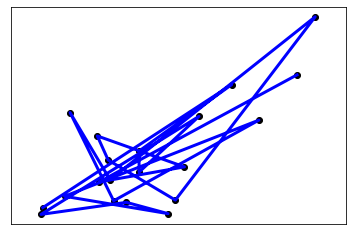

In [88]:
plt.scatter(diabetes_X_test,diabetes_y_test,color='black')
plt.plot(diabetes_X_test,diabetes_y_test,color='blue',linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()

9.3 dummy estimator(不需要输入自变量):

首先是DummyClassifier

straified(分层):通过尊重训练集类别分布，分层生成随机预测

most_frequent:预测时返回出现最多的那一类

prior:总是预测类的排序

uniform:随机产生预测

constant:预测用户提供的常数label

然后是DummyRegressor,有mean,median,quantile等方法

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

X,y=load_iris(return_X_y=True)
y[y!=1]=-1#只分为两类
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

###comparetheaccuracyofSVCandmost_frequent
from sklearn.dummy import DummyClassifier
from sklearn.svm import SVC
clf = SVC(kernel='linear',C=1).fit(X_train,y_train)
#C是目标函数中松弛因子的惩罚系数值。
clf.score(X_test,y_test)

0.631578947368421

In [ ]:
###change the kernel
clf=SVC(kernel='rbf',C=1).fit(X_train,y_train)
clf.score(X_test,y_test)#rbf表示径向基核函数

In [14]:
clf = DummyClassifier(strategy='most_frequent',random_state=0)
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.5789473684210527

10. 无监督学习：无y值
高斯混合模型；聚类；density估计；神经网络

In [94]:
#例子1-k均值聚类
from sklearn.cluster import KMeans
X = np.array([[1, 2], [1, 4], [1, 0],[10, 2], [10, 4], [10, 0]])
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
print(kmeans.labels_)
kmeans.predict([[0, 0], [12, 3]])
print(kmeans.cluster_centers_)


[1 1 1 0 0 0]
[[10.  2.]
 [ 1.  2.]]


In [104]:
#例子2
from mpl_toolkits.mplot3d import Axes3D
np.random.seed(5)
x=iris.data
y=iris.target
estimators=[('k_means_iris_8', KMeans(n_clusters=8)),('k_means_iris_3', KMeans(n_clusters=3)),('k_means_iris_bad_init', KMeans(n_clusters=3,n_init=1, init='random'))]
#init:用于指定初始的簇中心设置方法，如果为'k-means++',则表示设置的初始簇中心之间相距较远；如果为'random'，则表示从数据集中随机挑选k个样本作为初始簇中心；如果为数组则表示相应的簇中心。
#n_init用于指定算法运行次数，每次运行都会选择不同的初始簇中心

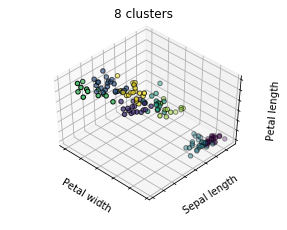

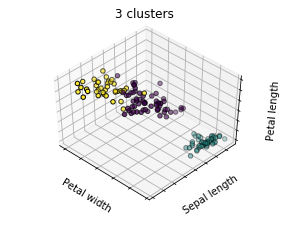

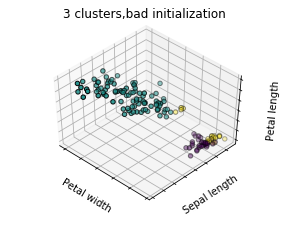

In [107]:
fignum=1
titles=['8 clusters','3 clusters','3 clusters,bad initialization']
for name,est in estimators:
    fig=plt.figure(fignum,figsize=(4,3))
    ax=Axes3D(fig,rect=[0,0,.95,1],elev=48,azim=134)
    est.fit(x)
    labels=est.labels_

    ax.scatter(x[:,3],x[:,0],x[:,2],c=labels.astype(np.float),edgecolors='k')
    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Petal width')
    ax.set_ylabel('Sepal length')
    ax.set_zlabel('Petal length')
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  app.launch_new_instance()


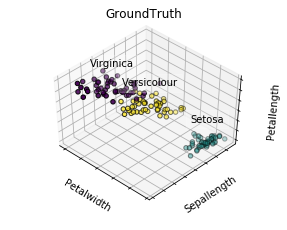

In [99]:
fig=plt.figure(fignum,figsize=(4,3))
ax=Axes3D(fig,rect=[0,0,.95,1],elev=48,azim=134)
for name,label in [('Setosa',0),('Versicolour',1),('Virginica',2)]:
    ax.text3D(x[y == label, 3].mean(),x[y == label, 0].mean(),x[y == label, 2].mean() + 2, name,horizontalalignment='center',bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))

y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(x[:, 3], x[:, 0], x[:, 2], c=y, edgecolor='k')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petalwidth')
ax.set_ylabel('Sepallength')
ax.set_zlabel('Petallength')
ax.set_title('GroundTruth')
ax.dist = 12
fig.show()


在机器学习任务中，拿到数据后，我们首先会将原始数据集分为三部分：训练集，验证集和测试集。训练集用于训练模型，验证集用于模型的参数选择配置，测试集对于模型来说是未知数据，用于评估模型的泛化能力。

验证集的必要性：在评估不同的设置（“超参数”）预评估器（例如必须为SVM手动设置的C设置）时，仍然存在测试集过拟合的风险，因为可以对参数进行调整，直到估计器达到最佳性能为止。

验证数据集可用于通过提前停止进行正则化：当验证数据集的错误增加时停止训练，因为这是过度拟合训练数据集的标志。

验证数据集起混合作用：它是测试使用的训练数据，但既不是低层训练的一部分，也不是最终测试的一部分。

验证数据集还可以在其他形式的模型准备中发挥作用，例如特征选择。

训练集的模型拟合包括利用相应的迭代算法进行变量选择和最优参数选择。

在k-fold交叉验证中，验证集和测试集不做区分,不用保留验证集。可以
在k-fold直接利用训练集做调参。

伪代码
data=...
train,validation,test=split(data)
#调参
parameters=...
for params in parameters:
    model=fit(train,params)
    skill=evaluate(model,validation)

#评估模型
model=fit(train)
skill=evaluate(model,test)

11.模型持久性--训练过的模型可以保存下来以后使用

In [15]:
from sklearn import svm
from sklearn import datasets
clf=svm.SVC()
X,y=datasets.load_iris(return_X_y=True)
clf.fit(X,y)
#方法一：用pickle
import pickle
s=pickle.dumps(clf)
clf2=pickle.loads(s)
clf2.predict(X[0:1])

C:\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


array([0])

In [16]:
#方法二：joblib比pickle更有效率，尤其是对于有大量数据集的对象。
from joblib import dump,load
dump(clf,'filename.joblib')#转储
clf=load('filename.joblib')#加载

12.Validation curves(验证曲线):score的可视化(各种曲线)

通常我们通过选择算法和设置超参数来使得bais和variance尽可能的低。

The bias of an estimator is its average error for different trainingsets。

欠拟合(underfiting)有高的bias
过拟合(overfiting)有高的variance,对训练集有很高的敏感性。

以超参数为横轴，训练集分数和验证集分数为数轴作图，分析估计器是欠拟合还是过拟合。用函数'validation_curve'实现。

如果训练集SCORE和验证集SCORE都是低的，表示欠拟合。
如果训练集SCORE是高的，验证集是地的，表示过拟合。

In [18]:
import numpy as np
from sklearn.model_selection import validation_curve
from sklearn.datasets import load_iris
from sklearn.linear_model import Ridge

validation_curve(estimator, X, y, param_name, param_range, groups=None, cv='warn', scoring=None, n_jobs=None, pre_dispatch='all', verbose=0, error_score='raise-deprecating')

In [19]:
np.random.seed(0)
X,y=load_iris(return_X_y=True)
indices=np.arange(y.shape[0])
np.random.shuffle(indices)#把顺序打乱
X,y=X[indices],y[indices]
train_scores,valid_scores=validation_curve(Ridge(),X,y,'alpha',np.logspace(-7,3,3),cv=5)
print(train_scores)
print(valid_scores)

[[0.93402178 0.94366418 0.92648383 0.91933313 0.92922507]
 [0.9340217  0.94366412 0.92648377 0.91933304 0.929225  ]
 [0.51143526 0.52415737 0.49868907 0.47086988 0.49623503]]
[[0.9055033  0.84185935 0.94569793 0.96231017 0.93366144]
 [0.90550088 0.84184574 0.94568969 0.96233172 0.93366806]
 [0.46706558 0.25698974 0.50496293 0.49826404 0.52500014]]


13.学习曲线

显示的是随着训练集样本数的变化，验证集SCORE和训练集SCORE的变化。可以用learning_curve

所需的数据是：已使用的样本数量，训练集的平均分数和验证集的平均分数。

如果训练集分数和测试集分数随着样本容量增大，收敛于一个低值，则增加样本不会有太大效果。

如果训练集分数大于测试集分数，增加更多训练集会增加模型的泛化能力。

learning_curve(estimator, X, y, groups=None, train_sizes=np.linspace(0.1,1.0,5), cv='warn', scoring=None, exploit_incremental_learning=False, n_jobs=None, pre_dispatch='all', verbose=0, shuffle=False, random_state=None, error_score='raise-deprecating')

In [28]:
from sklearn.model_selection import learning_curve
from sklearn.svm import SVC
train_sizes,train_scores,valid_scores=learning_curve(SVC(kernel='linear'),X,y,train_sizes=[50,80,110],cv=5)

train_sizes
train_scores
valid_scores

array([[1.        , 0.93333333, 1.        , 1.        , 0.96666667],
       [1.        , 0.96666667, 1.        , 1.        , 0.96666667],
       [1.        , 0.96666667, 1.        , 1.        , 0.96666667]])

14.审查和可视化

预测performance是机器学习的主要目标，然而，用评估指标来概括性能通常是不够的：它假设评估指标和测试数据集完美地反映了目标域，这很少是真的。

在某些领域中，模型在部署之前需要具有一定程度的可解释性。
需要对表现出性能问题的模型进行调试，以了解模型的根本问题。sklearn.inspection模块提供了有助于理解模型预测和影响预测因素的工具。
可以用来评估模型的假设和偏差，设计更好的模型或诊断模型性能问题。

审查

14.1 Partial dependence plots

部分依赖图（PDP）显示目标响应与一组“目标”功能之间的依赖关系，在所有其他功能（“互补”功能）的值上处于边际位置。（相当于多元回归中的回归系数） 直观地讲，我们可以将部分依赖关系解释为响应变量与因变量的函数。

sklearn.inspection模块提供了函数plot_partial_dependence来创建 one-way和two-way部分依赖图。

14.2 Permutation feature importance(排列特征的重要性)

排列特征的重要性定义为当随机改变单个特征值时模型得分的降低。这对于非线性或不透明的估计量特别有用。该技术得益于模型不可知性，可以根据特征的不同排列多次计算。permutation_importance 函数能够计算特征重要性。

14.3 可视化：Scikit-learn为机器学习可视化定义了API，API的特征就是作图快速，可视化调整不用重新计算。

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import plot_roc_curve
from sklearn.datasets import load_wine

ImportError: cannot import name 'plot_roc_curve' from 'sklearn.metrics' (C:\Anaconda3\lib\site-packages\sklearn\metrics\__init__.py)